**AEROFIT BUSINESS CASE STUDY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('aerofit_treadmill.csv')

**1. Defining Problem Statement and Analysing basic metrics.**

**Business Problem**

AeroFit aims to enhance its customer recommendation system by understanding the demographic and behavioral characteristics of buyers for each of its treadmill products. The market research team is tasked with identifying patterns and differences among customer segments (e.g., age, gender, fitness level, income) associated with each treadmill model. This analysis will support data-driven product recommendations and help tailor marketing strategies

In [ ]:
#Observation: The data consists of information about the products, the age, gender, education, marital status, usage, fitness, income about the clients
#along with the miles the equipment was used by the customers
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#Observation: the dataset consists of 180 rows and 9 columns, with no missing values. The categorical columns are in the object format in the dataset
#The numerical columns are in the integer format.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#Observation: Summary of the numerical columns shows that, customers range from 18 to 50 years of age, with an average age of 29 years.
#Majority are under 26 years, indicating a younger customer base. Most users have 14–16 years of education, with a median of 16 years, suggesting college-educated individuals.
#The average usage frequency is ~3.5 times per week. 50% of users use the treadmill 3 times/week, with a few customers using it up to 7 times/week.
#Most customers rate their fitness between 3 and 4 (out of 5), with a median of 3 — suggesting moderately fit users.
#Income ranges from ~₹29,500 to ₹1,04,500, with a mean of ₹53,700. Mean>Median in the income data suggesting a right-skewed distribution, with 25% earning below ₹44,000.
#customers travel an average of 103 miles per week, with some high-activity users going up to 360 miles. Most (75%) travel less than 115 miles weekly.
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
#Observation: The dataset consists of 180 rows and 9 columns
data.shape

(180, 9)

In [ ]:
#Observation: There are no missing values
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
#Obsevations: The Product, Gender, MaritalStatus and Fitness categorical columns were converted to 'category' type.
data['Product']=data['Product'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')
data['Fitness']=data['Fitness'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


**2. Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
#Observations: Aerofit offers three product, KP281, KP481, KP781 to a wide range of customers from young to middle aged. Since the customers are well educated,
#they could respond to tech/features. Some of the users use the device for 7 times a week which demands high performance/durability for the equipments. Wide range of
#income for the customers. High mileage users may prefer performance-focussed models.
for cols in data.columns:
  print(f"\nColumn: {cols},Unique: {data[cols].nunique()}")
  print(data[cols].unique())


Column: Product,Unique: 3
['KP281' 'KP481' 'KP781']

Column: Age,Unique: 32
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Column: Gender,Unique: 2
['Male' 'Female']

Column: Education,Unique: 8
[14 15 12 13 16 18 20 21]

Column: MaritalStatus,Unique: 2
['Single' 'Partnered']

Column: Usage,Unique: 6
[3 2 4 5 6 7]

Column: Fitness,Unique: 5
[4 3 2 1 5]

Column: Income,Unique: 62
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Column: Miles,Unique: 37
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  2

In [ ]:
#Observations: The customer base leans slightly male.
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
#Observations: Slightly more customers are partnered.
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
#Observation: KP281 is the most popular model, possibly the best fit for a broad audience.
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


**3. Visual Analysis - Univariate & Bivariate.
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot For correlation: Heatmaps, Pairplots**

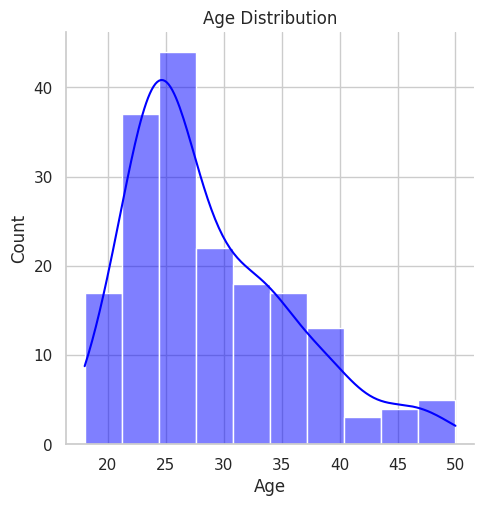

In [ ]:
#Observation: Majority are young adults within the age range of 20-30
sns.set(style="whitegrid")
sns.displot(data['Age'],bins=10,kde=True,color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

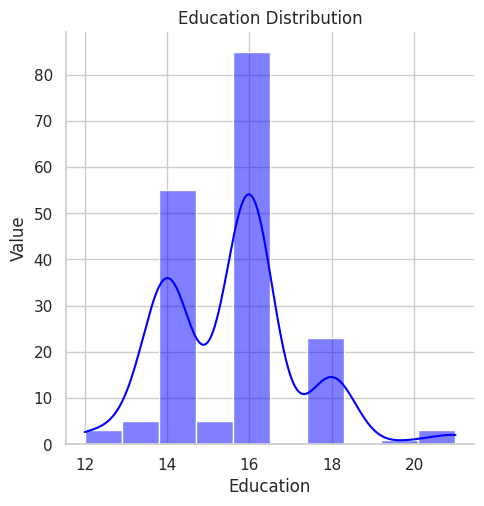

In [ ]:
#Observation: Most customers have 14–16 years of education, indicating they are well-educated.
sns.set(style="whitegrid")
sns.displot(data['Education'],bins=10,kde=True,color='blue')
plt.xlabel('Education')
plt.ylabel('Value')
plt.title('Education Distribution')
plt.show()

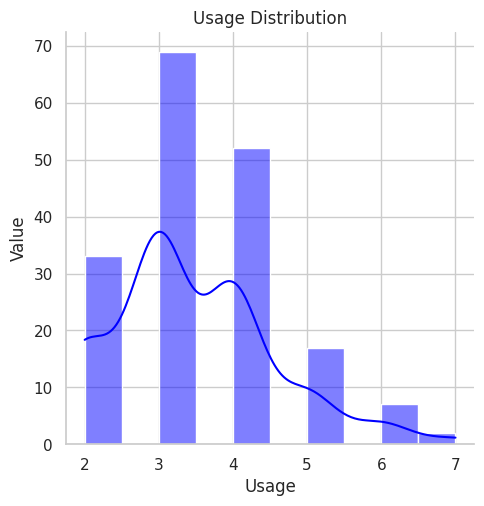

In [ ]:
#Observation: Customers vary from light to heavy users, with most using treadmills moderately
sns.set(style="whitegrid")
sns.displot(data['Usage'],bins=10,kde=True,color='blue')
plt.xlabel('Usage')
plt.ylabel('Value')
plt.title('Usage Distribution')
plt.show()

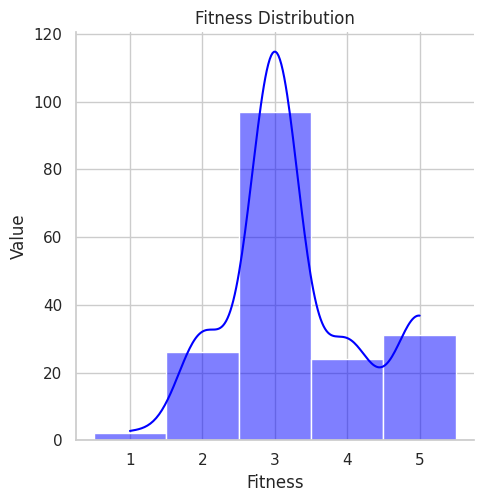

In [ ]:
#Observation: Most customers cluster around levels 3 and 4 (moderate to high fitness)
sns.set(style="whitegrid")
sns.displot(data['Fitness'],bins=10,kde=True,color='blue')
plt.xlabel('Fitness')
plt.ylabel('Value')
plt.title('Fitness Distribution')
plt.show()

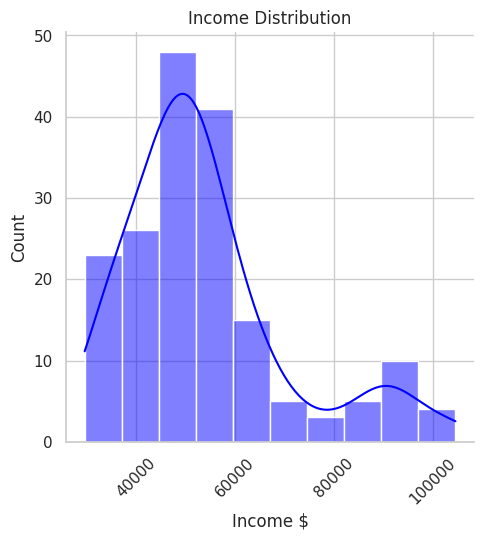

In [ ]:
#Observation: Wide spread from low to high income customers. The kde plot shows a right skewed distribution.
sns.set(style="whitegrid")
sns.displot(data['Income'],bins=10,kde=True,color='blue')
plt.xlabel('Income $')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.xticks(rotation=45)
plt.show()

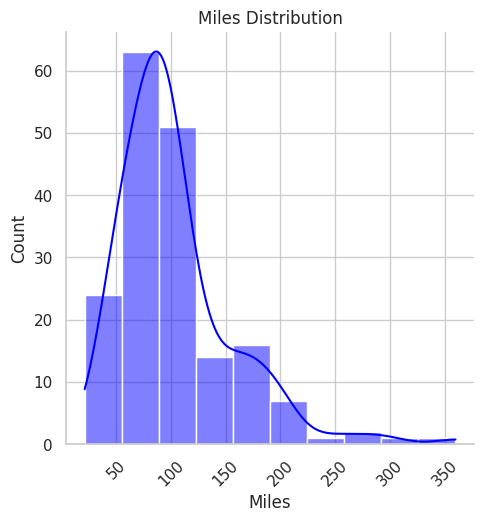

In [ ]:
#Observation: The peak around 50-100 miles suggests moderate treadmill usage
sns.set(style="whitegrid")
sns.displot(data['Miles'],bins=10,kde=True,color='blue')
plt.xlabel('Miles')
plt.ylabel('Count')
plt.title('Miles Distribution')
plt.xticks(rotation=45)
plt.show()

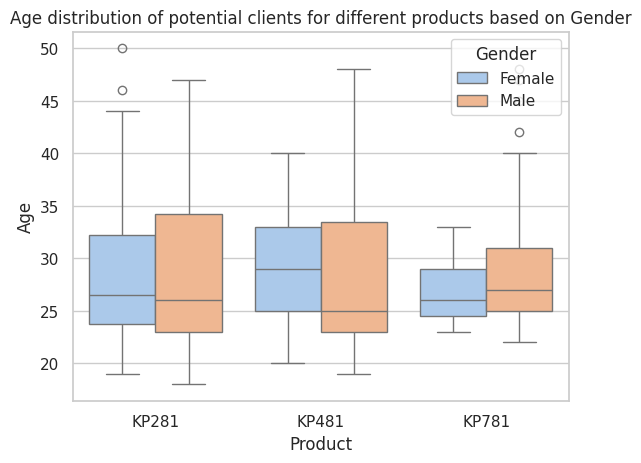

In [ ]:
#Observation: The boxplots shows that, KP281 and KP481 cater to a wider age range. KP481 is preferred by female customers in the higher age range.
sns.boxplot(x=data['Product'],y=data['Age'],hue=data['Gender'],palette='pastel')
plt.xlabel('Product')
plt.ylabel('Age')
plt.title('Age distribution of potential clients for different products based on Gender')
plt.show()

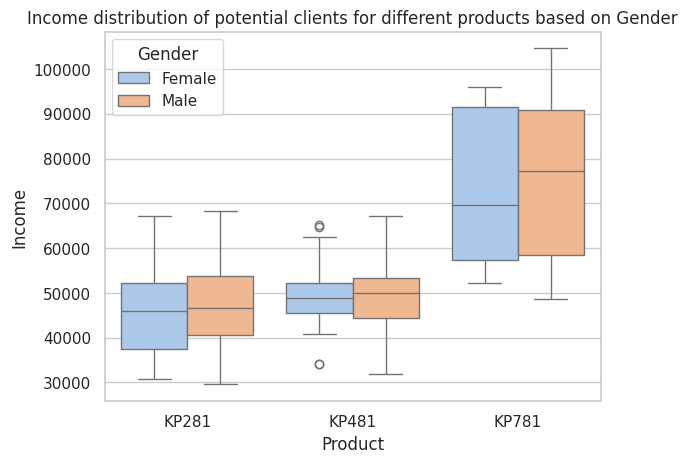

In [ ]:
#Observation: KP281/KP481 models are preferred by the relatively low/moderate-income customers whereas the KP781 model is preferred by high-income customers.
sns.boxplot(x=data['Product'],y=data['Income'],hue=data['Gender'],palette='pastel')
plt.xlabel('Product')
plt.ylabel('Income')
plt.title('Income distribution of potential clients for different products based on Gender')
plt.show()

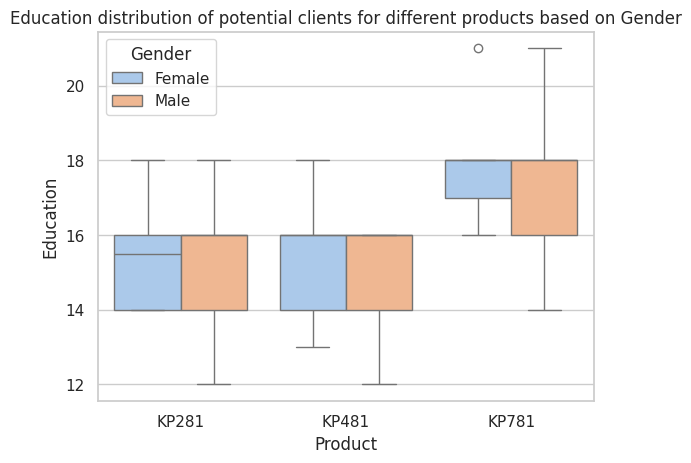

In [ ]:
#Observation: Customers with high-school to bachelors degree prefer the KP281/KP481 model whereas graduate and higher education customers prefer the KP781 model.
sns.boxplot(x=data['Product'],y=data['Education'],hue=data['Gender'],palette='pastel')
plt.xlabel('Product')
plt.ylabel('Education')
plt.title('Education distribution of potential clients for different products based on Gender')
plt.show()

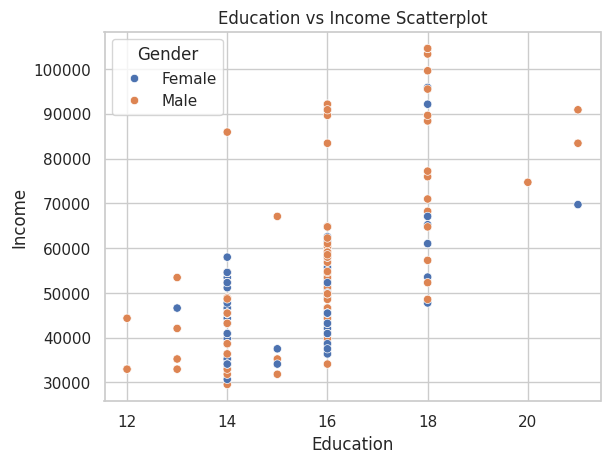

In [ ]:
#Observation: There is indeed a positive corelation between education and income which could suggest the preference of the high-income/high-educated customers towards
#more technical and high priced model of KP781
sns.scatterplot(data=data,x='Education',y='Income',hue='Gender')
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Education vs Income Scatterplot')
plt.show()

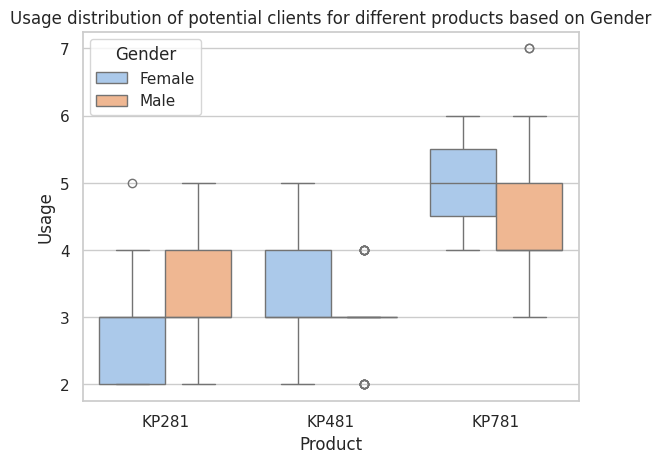

In [ ]:
#Observation: Usage on the KP281 model is less compared to the KP781 which suggests a need for more durability in the KP781 model for the high performance customers
#while KP281 and KP481 caters more to a wider customers group
sns.boxplot(x=data['Product'],y=data['Usage'],hue=data['Gender'],palette='pastel')
plt.xlabel('Product')
plt.ylabel('Usage')
plt.title('Usage distribution of potential clients for different products based on Gender')
plt.show()

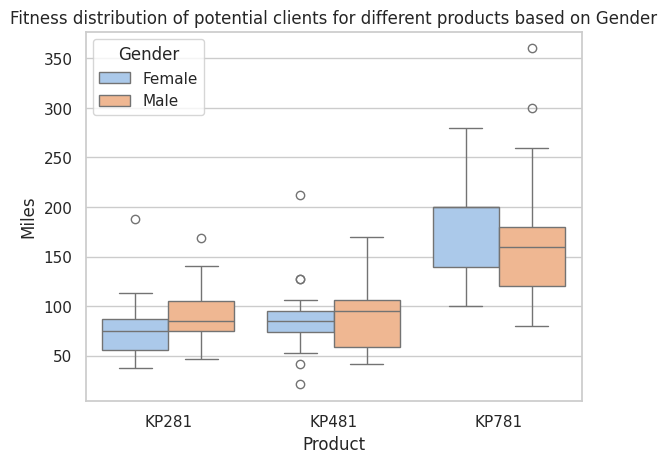

In [ ]:
#Simialrly, the KP781 model is used more compared to the KP281 and KP481 models demanding durability.
sns.boxplot(x=data['Product'],y=data['Miles'],hue=data['Gender'],palette='pastel')
plt.xlabel('Product')
plt.ylabel('Miles')
plt.title('Fitness distribution of potential clients for different products based on Gender')
plt.show()

**Histogram and Pairplots**

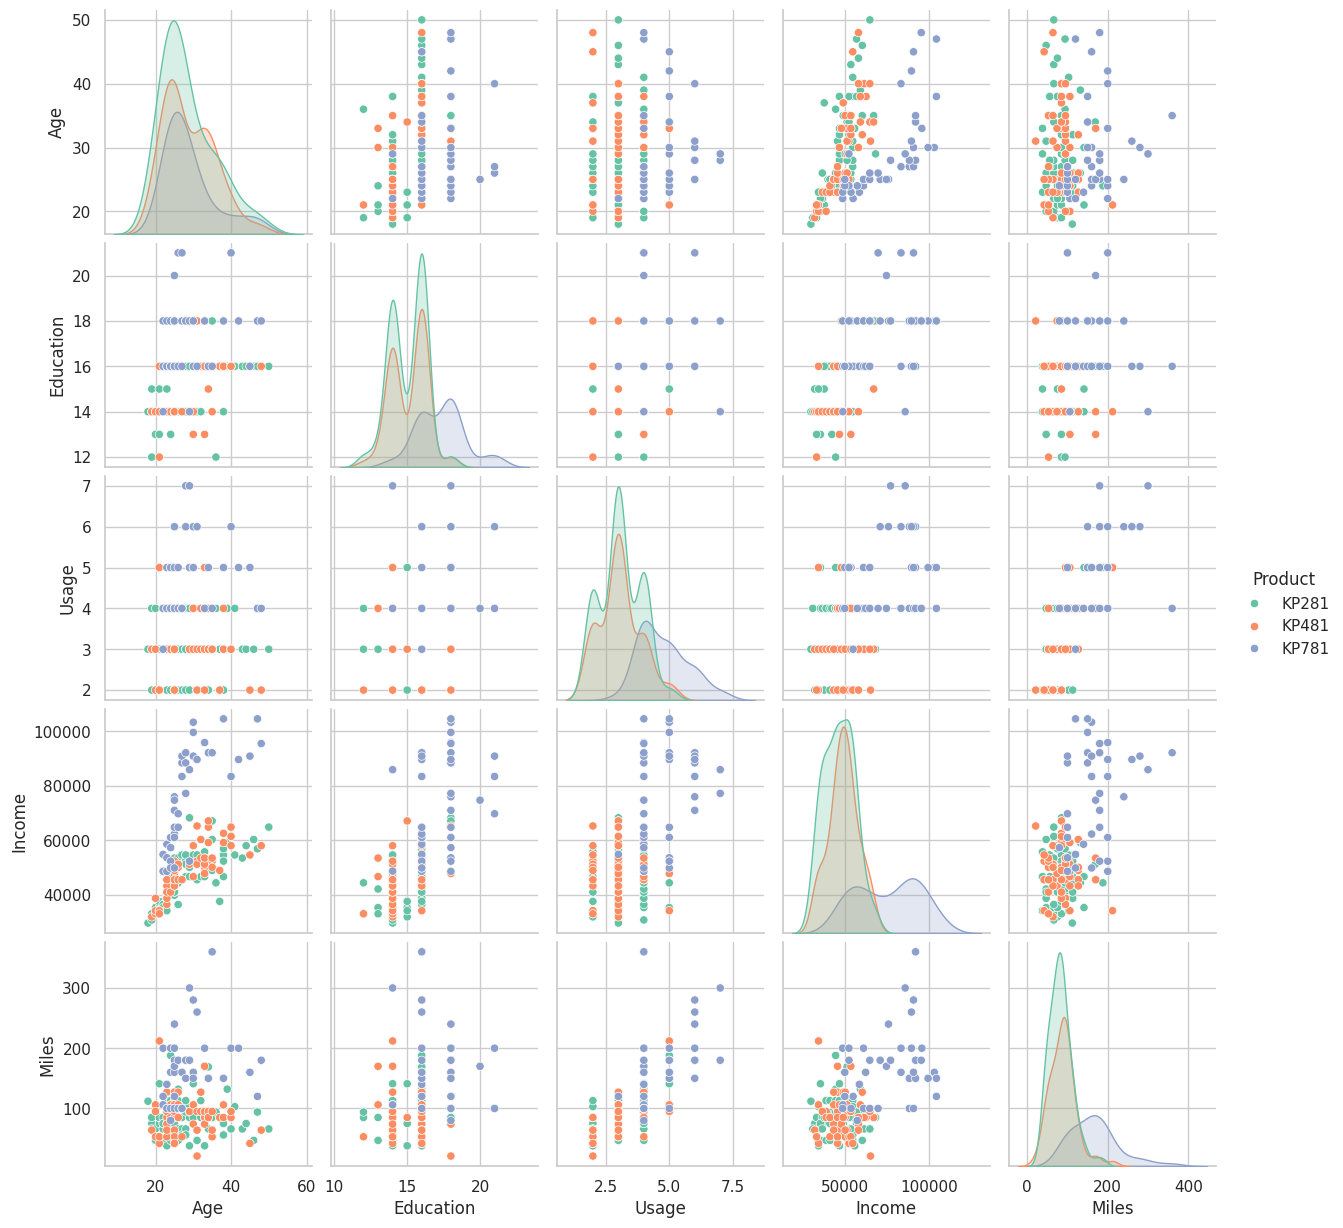

In [ ]:
#The pairplots show the scatterplots between different attributes. As epxected there is a positive relation between the education and income.
#As expected, the KP781 product is preferred among the high income and high education group, whereas KP481 and KP281 models are preferred by the wider customer category.
#In the diagnoal kde plots, a right shift is evident for the KP781 model for the Education, Usage, Income, and miles category. But there is no age associated
#preference for the models. Higher usage and miles are observed among the KP781 users.
sns.pairplot(data=data,hue='Product',palette='Set2')
plt.show()

In [ ]:
data_numerical=data[['Age','Education','Usage','Income','Miles']]
corr=data_numerical.corr()
corr

,Age,Education,Usage,Income,Miles
Age,1.000000,0.280496,0.015064,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.519537,0.759130
Income,0.513414,0.625827,0.519537,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.543473,1.000000


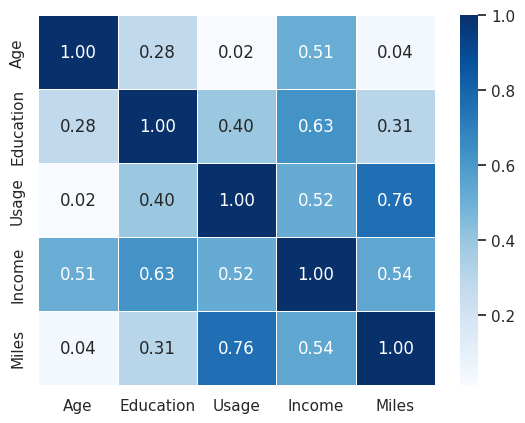

In [ ]:
#Observation: Similar to the above observed findings, there is comparatively higher corelation between (miles & usage), (income & miles), (income and education),
#primarily arising from the preference of the KP781 by high performance individuals.
sns.heatmap(corr,cmap='Blues',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

<ipython-input-109-cde30d0673e8>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data.pivot_table(values='Income', index='Gender', columns='MaritalStatus', aggfunc='mean')


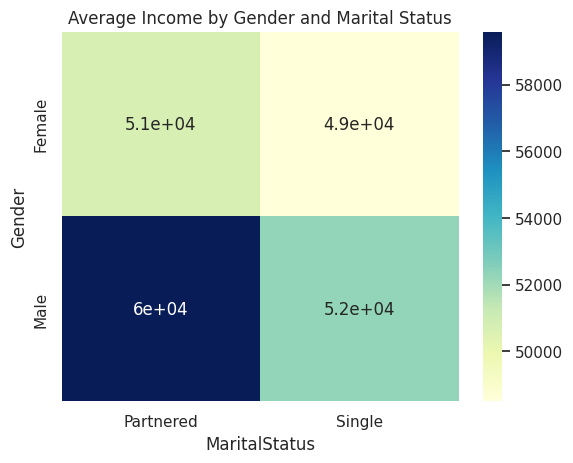

In [ ]:
#Observation: The below heatmap between maritalStatus and Gender show that, the number of partnered male customers is higher, followed by single male customers.
#This could provide clue towards targetted ads for customers based on Gender.
pivot = data.pivot_table(values='Income', index='Gender', columns='MaritalStatus', aggfunc='mean')
pivot
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Average Income by Gender and Marital Status')
plt.show()

<ipython-input-111-8bcdbda0f19a>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_product_fitness = data.pivot_table(values='Income', index='Product', columns='Fitness', aggfunc='mean')


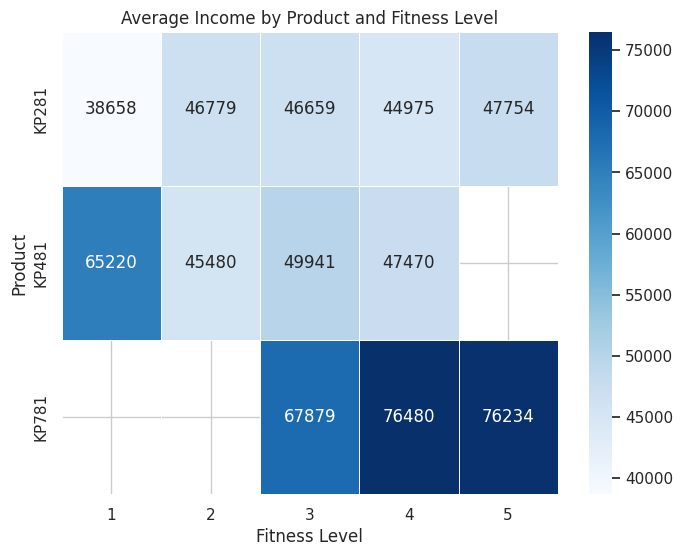

In [ ]:
#Observation: The heatmap shows that, the fitness and income of the KP781 customers is higher compared to the rest of the customer segment,
#whereas for the KP481 model is preferred by relatively lower and medium income customers. Interestingly, the KP281 model is preferred by the wider fitness range customers
#with lower to medium income segment.
pivot_product_fitness = data.pivot_table(values='Income', index='Product', columns='Fitness', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_product_fitness, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)
plt.title('Average Income by Product and Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Product')
plt.show()

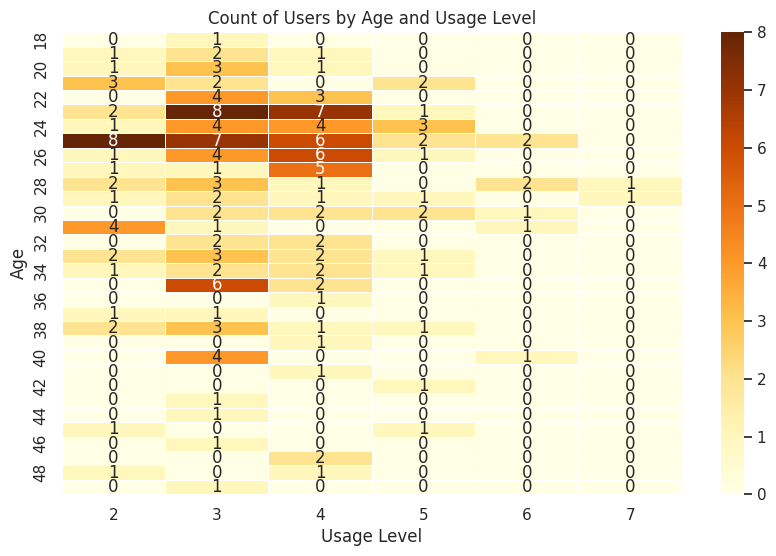

In [ ]:
#Observation: The heatmap shows that, the majority of the customers fall in younger age category and the average usage of 3 times per week.
pivot_age_usage = data.pivot_table(index='Age', columns='Usage', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_age_usage, annot=True, cmap='YlOrBr', fmt='d', linewidths=0.5)
plt.title('Count of Users by Age and Usage Level')
plt.xlabel('Usage Level')
plt.ylabel('Age')
plt.show()

**4. Outlier detection using boxplots**

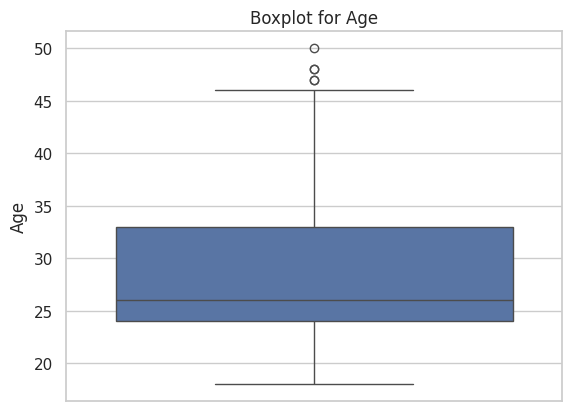

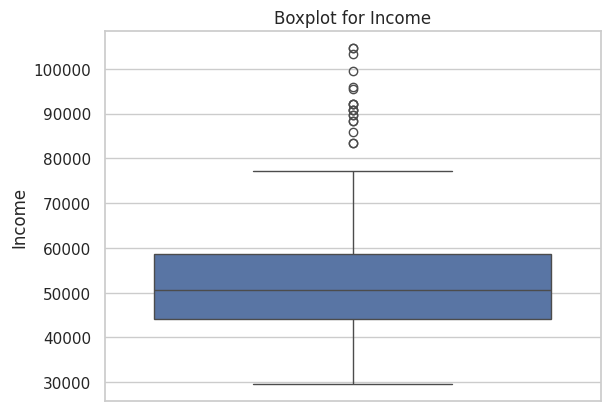

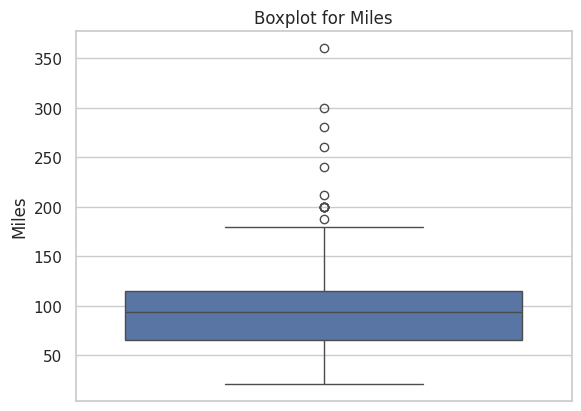

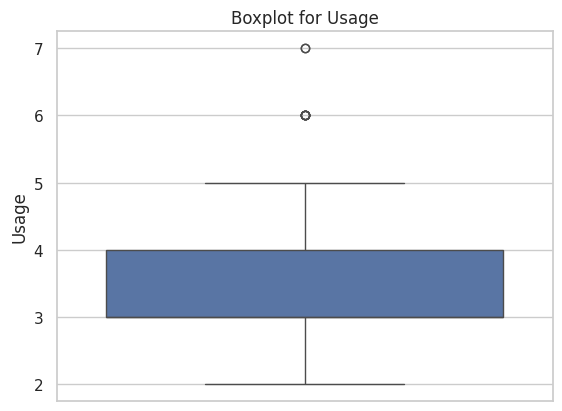

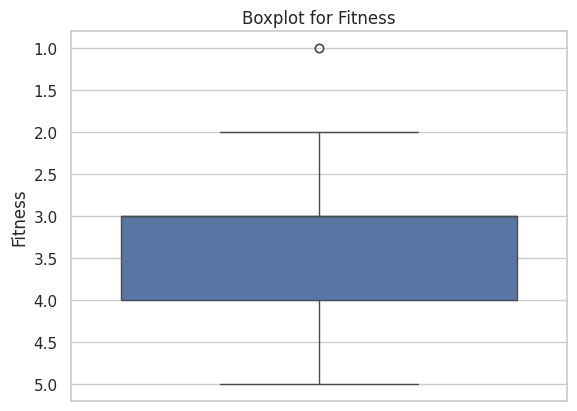

In [ ]:
#The boxplots show the number of outliers in the numerical columns.
for col in ['Age', 'Income', 'Miles', 'Usage', 'Fitness']:
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
#Observation: The number of outliers in the numerical values are shown below. The ouliers in the income group are not removed because they indicate the high income segment for the
#customers of the high priced KP781 model. The outliers in the miles are also not removed because they could represent the high performance athletes who prefer the
#high-end model of KP781. The rest of the outliers are few in number and they do no show a high difference between the median and mean. Hence none of the outliers are removed.
for col in ['Age', 'Income', 'Miles', 'Usage','Education']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Age: 5 outliers
Income: 19 outliers
Miles: 13 outliers
Usage: 9 outliers
Education: 4 outliers


In [ ]:
#Observation: The dfference between the mean and median for the miles and income are expected due to the niche customer segment for the KP781 model. The rest of the outliers do not
#show a great difference between the mean and median
ummary = data.describe()

# Compute Mean vs Median difference
num_cols=['Age','Education','Income','Miles','Usage']
for col in num_cols:
    mean = summary.loc['mean', col]
    median = data[col].median()
    diff = mean - median
    print(f"{col}: Mean = {mean:.2f}, Median = {median}, Difference = {diff:.2f}")

Age: Mean = 28.79, Median = 26.0, Difference = 2.79
Education: Mean = 15.57, Median = 16.0, Difference = -0.43
Income: Mean = 53719.58, Median = 50596.5, Difference = 3123.08
Miles: Mean = 103.19, Median = 94.0, Difference = 9.19
Usage: Mean = 3.46, Median = 3.0, Difference = 0.46


**5. Marginal and Conditional Pribability for Customer Profiling**

In [ ]:
age_bins = [0,15,20,25,30,35,40,45,50,55]
age_labels = ['0-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55']
data['age_group']=pd.cut(data['Age'],bins=age_bins,labels=age_labels,right=False)

income_bins = [0, 30000, 50000, 70000, 100000, float('inf')]
income_labels = ['<30k', '30k-50k', '50k-70k', '70k-100k', '100k+']
data['income_group']=pd.cut(data['Income'],bins=income_bins,labels=income_labels,right=False)

miles_bins = [0, 50, 100, 150, 200, float('inf')]
miles_labels = ['<50', '50-100', '100-150', '150-200', '200+']
data['miles_group'] = pd.cut(data['Miles'], bins=miles_bins, labels=miles_labels, right=False)


In [ ]:
attributes = ['Product', 'Gender', 'age_group', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'income_group', 'miles_group']
marginal_tables = {}
for col in attributes:
    counts = pd.crosstab(index=data[col], columns='Count')
    counts['Prob'] = np.round(counts['Count'] / counts['Count'].sum(), 2)
    marginal_tables[col] = counts

print("Marginal probability for Product:")
print(marginal_tables['Product'])

print("\nMarginal probability for Gender:")
print(marginal_tables['Gender'])

print("\nMarginal probability for Age:")
print(marginal_tables['age_group'])

print("\nMarginal probability for Education:")
print(marginal_tables['Education'])

print("\nMarginal probability for MaritalStatus:")
print(marginal_tables['MaritalStatus'])

print("\nMarginal probability for Usage:")
print(marginal_tables['Usage'])

print("\nMarginal probability for Fitness:")
print(marginal_tables['Fitness'])

print("\nMarginal probability for Income:")
print(marginal_tables['income_group'])

print("\nMarginal probability for Miles:")
print(marginal_tables['miles_group'])


Marginal probability for Product:
col_0    Count  Prob
Product             
KP281       80  0.44
KP481       60  0.33
KP781       40  0.22

Marginal probability for Gender:
col_0   Count  Prob
Gender             
Female     76  0.42
Male      104  0.58

Marginal probability for Age:
col_0      Count  Prob
age_group             
16-20          5  0.03
21-25         49  0.27
26-30         59  0.33
31-35         31  0.17
36-40         19  0.11
41-45          9  0.05
46-50          7  0.04
51-55          1  0.01

Marginal probability for Education:
col_0      Count  Prob
Education             
12             3  0.02
13             5  0.03
14            55  0.31
15             5  0.03
16            85  0.47
18            23  0.13
20             1  0.01
21             3  0.02

Marginal probability for MaritalStatus:
col_0          Count  Prob
MaritalStatus             
Partnered        107  0.59
Single            73  0.41

Marginal probability for Usage:
col_0  Count  Prob
Usage             

In [ ]:
def conditional_prob(attribute):
  return pd.crosstab(data['Product'],data[attribute],normalize='index')

prob_gender_given_product=conditional_prob('Gender')
prob_age_given_product = conditional_prob('age_group')
prob_fitness_given_product = conditional_prob('Fitness')
prob_usage_given_product = conditional_prob('Usage')
prob_marital_given_product = conditional_prob('MaritalStatus')
prob_education_given_product = conditional_prob('Education')
prob_income_given_product = conditional_prob('income_group')
prob_miles_given_product = conditional_prob('miles_group')

print(f'P(Gender/Product):\n{prob_gender_given_product}')
print(f'\nP(Age/Product):\n{prob_age_given_product}')
print(f'\nP(Fitness/Product):\n{prob_fitness_given_product}')
print(f'\nP(Usage/Product):\n{prob_usage_given_product}')
print(f'\nP(Marital/Product):\n{prob_marital_given_product}')
print(f'\nP(Education/Product):\n{prob_education_given_product}')
print(f'\nP(Income/Product):\n{prob_income_given_product}')
print(f'\nP(Miles/Product):\n{prob_miles_given_product}')

P(Gender/Product):
Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000

P(Age/Product):
age_group     16-20     21-25     26-30  31-35     36-40  41-45     46-50  \
Product                                                                     
KP281      0.050000  0.287500  0.325000  0.125  0.125000   0.05  0.025000   
KP481      0.016667  0.266667  0.266667  0.250  0.116667   0.05  0.033333   
KP781      0.000000  0.250000  0.425000  0.150  0.050000   0.05  0.075000   

age_group   51-55  
Product            
KP281      0.0125  
KP481      0.0000  
KP781      0.0000  

P(Fitness/Product):
Fitness         1      2      3         4      5
Product                                         
KP281    0.012500  0.175  0.675  0.112500  0.025
KP481    0.016667  0.200  0.650  0.133333  0.000
KP781    0.000000  0.000  0.100  0.175000  0.725

P(Usage/Product):
Usage           2         3      4      5      6     

In [ ]:
def reverse_conditional_prob(attribute):
    return pd.crosstab(data[attribute], data['Product'], normalize='index')

prob_product_given_gender = reverse_conditional_prob('Gender')
prob_product_given_age = reverse_conditional_prob('age_group')
prob_product_given_fitness = reverse_conditional_prob('Fitness')
prob_product_given_marital = reverse_conditional_prob('MaritalStatus')
prob_product_given_income = reverse_conditional_prob('income_group')
prob_product_given_usage = reverse_conditional_prob('Usage')

print(f'P(Product/Gender):\n{prob_product_given_gender}')
print(f'\nP(Product/Age):\n{prob_product_given_age}')
print(f'\nP(Product/Fitness):\n{prob_product_given_fitness}')
print(f'\nP(Product/Marital):\n{prob_product_given_marital}')
print(f'\nP(Product/Income):\n{prob_product_given_income}')
print(f'\nP(Product/Usage):\n{prob_product_given_usage}')

P(Product/Gender):
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308

P(Product/Age):
Product       KP281     KP481     KP781
age_group                              
16-20      0.800000  0.200000  0.000000
21-25      0.469388  0.326531  0.204082
26-30      0.440678  0.271186  0.288136
31-35      0.322581  0.483871  0.193548
36-40      0.526316  0.368421  0.105263
41-45      0.444444  0.333333  0.222222
46-50      0.285714  0.285714  0.428571
51-55      1.000000  0.000000  0.000000

P(Product/Fitness):
Product     KP281     KP481     KP781
Fitness                              
1        0.500000  0.500000  0.000000
2        0.538462  0.461538  0.000000
3        0.556701  0.402062  0.041237
4        0.375000  0.333333  0.291667
5        0.064516  0.000000  0.935484

P(Product/Marital):
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0

**Customer Profile:**
Product KP281 is the Popular Choice
Gender: Evenly split (50% male, 50% female)
Age: Mostly 26–30 (32.5%).
Fitness: Mostly moderate (3)
Usage: Primarily moderate (3–4 times per week)
Education: Mostly 16 years (bachelor’s degree) and 14 years
Income: Mostly 30k–50k (58.75%)
Miles: Predominantly 50–100 miles
Marital Status: 60% Partnered

Product KP481
Gender: Slightly more male (51.7%)
Age: Balanced spread across 21–40, especially 21–35
Fitness: Mostly 3
Usage: Mostly usage level 3 times per week
Education: Predominantly 16 years (51.7%), then 14 years
Income: Equal split between 30k–50k and 50k–70k
Miles: Mostly 50–100 miles (65%)
Marital Status: 60% Partnered

Product KP781
Gender: 82.5% male
Age: Skews younger to mid-range.
Fitness: Very high fitness (fitness = 5)
Usage: Heavy users (Usage = 5, 6, or 7 = 52.5%)
Education: More postgraduates (18–21 years of education)
Income: High-income skew (70k+ = 57.5%)
Miles: Higher use (>150 miles)
Marital Status: Slightly more Partnered



**Business Insights**
KP281 dominates has broader appeal, especially among young, middle-income, moderately fit users.

KP781 has strong appeal among high-end, fitness-focused male users, but its reach is limited — suggesting a niche market.

KP481 serves as a bridge product between KP281 and KP781, appealing to a wide but less loyal segment.

Fitness and usage intensity are highly correlated with product type — heavy users and fittest customers clearly prefer KP781.

**Actionable Recommendations**
A. Segmentation and Personalization
KP281: Maintain mass-market positioning. Consider bundling with basic fitness plans or student/young professional discounts.
KP481: Target customers on the edge of moderate to high engagement.
KP781: Market as a premium product. Use influencer marketing, performance athlete testimonials, and high-performance messaging.

B. Targeted Campaigns
For KP781, target ads to high-income males in the 26–40 age bracket, using performance language and premium positioning.
For KP281, use inclusive campaigns featuring both genders, highlighting reliability and value.
For KP481, focus on versatility, customization, and adaptability — appeal to those still evaluating options.

C. Product Strategy
Develop new features or training programs tied to KP781 to enhance loyalty among elite users.
Offer a “fitness progression plan” where customers can upgrade from KP281 → KP481 → KP781 based on their progress or engagement level.

D. Channel & Distribution
KP281 and KP481: Sell via general online marketplaces, gyms, and retail outlets.
KP781: Position through exclusive fitness platforms or premium club memberships.